In [ ]:
                                             #East_West Airlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans

In [2]:
ew = pd.read_excel("EastWestAirlines (1).xlsx" , sheet_name = "data")
ew1 = ew.drop(["ID#"] , axis=1)
print(ew1.describe())        #shows the summary


ew1.info()      #shows type and if there any missing values

            Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000   

In [12]:
#Now we have to normalize the value into the range of 0 to 1.
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

norm_ew = norm_func(ew1)
norm_ew.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_ew)
    TWSS.append(kmeans.inertia_)
    
TWSS

[1830.7932128584155,
 823.6756984125224,
 625.1684881570746,
 436.70885761932635,
 348.9433217254146,
 315.1503143847327,
 287.73110808120543,
 263.047477545166,
 245.45558195773322]

Text(0, 0.5, 'total_within_SS')

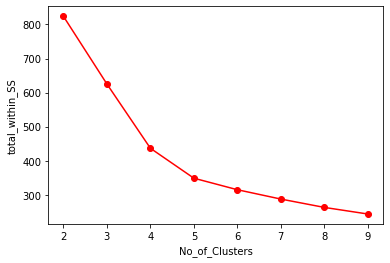

In [22]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [24]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(norm_ew)

model.labels_ # getting the labels of clusters assigned to each row 



array([2, 2, 2, ..., 3, 4, 4])

In [25]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
ew['category'] = mb # creating a  new column and assigning it to new column 
ew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  category           3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [26]:

ew_final = ew.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
ew_final



,category,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,2,19244,0,1,1,1,215,2,0,0,6968,0
2,2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,2,4,14776,0,1,1,1,500,1,0,0,6952,0
4,3,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,1,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,3,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
ew.iloc[:,1: ].groupby(ew.category).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,category
category,,,,,,,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1
2,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,2
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,3
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,4
